# Adults Income Prediction
The source of this dataset is UCI Machine Learning Repository. The dataset contains data of individuals regarding their age, Employement status, Marital Status, Gender, Race, Country of Origin and their annual Income. We are given two datasets the actual training set which we will be using for some Exploratory Analysis and to train our ML algorithm in the later stage of this notebook, and the test set which would be used to make Income predictions on. 

We would begin by cleaning and Exploring our data in order to build some insights regarding what features are more important and what role do they play in contributing to the Annual Income of a person

Importing Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

Loading the data from the system into a pandas dataframe

In [2]:
data = pd.read_csv('D:/adults/adult.data', sep = "\s+")
test = pd.read_csv('D:/adults/adult.test', sep = "\s+")

# Cleaning the train set

Observing the first five rows of the dataframe

In [3]:
data.head()

,"39,","State-gov,","77516,","Bachelors,","13,","Never-married,","Adm-clerical,","Not-in-family,","White,","Male,","2174,","0,","40,","United-States,",<=50K
0,"50,","Self-emp-not-inc,","83311,","Bachelors,","13,","Married-civ-spouse,","Exec-managerial,","Husband,","White,","Male,","0,","0,","13,","United-States,",<=50K
1,"38,","Private,","215646,","HS-grad,","9,","Divorced,","Handlers-cleaners,","Not-in-family,","White,","Male,","0,","0,","40,","United-States,",<=50K
2,"53,","Private,","234721,","11th,","7,","Married-civ-spouse,","Handlers-cleaners,","Husband,","Black,","Male,","0,","0,","40,","United-States,",<=50K
3,"28,","Private,","338409,","Bachelors,","13,","Married-civ-spouse,","Prof-specialty,","Wife,","Black,","Female,","0,","0,","40,","Cuba,",<=50K
4,"37,","Private,","284582,","Masters,","14,","Married-civ-spouse,","Exec-managerial,","Wife,","White,","Female,","0,","0,","40,","United-States,",<=50K


Dropping the columns that resemble no information. The data source too as no mention of what information do these columns provide.

In [4]:
data.drop(columns = ['77516,','13,','2174,','0,'], inplace = True)

Renaming all the remaining columns with meaningful names after checking with the source

In [5]:
data.columns = ['Age','Employment_type','Education','Marital_status','Occupation','Relationship','Race','Gender',
                'Work_hours_per_week','Native_country','Income']

Removing unnecessary commas from the data

In [6]:
cols = data.columns
data[cols] = data[cols].replace({',':''}, regex = True)

In [7]:
data.head()

,Age,Employment_type,Education,Marital_status,Occupation,Relationship,Race,Gender,Work_hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
1,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
2,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
3,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
4,37,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,<=50K


# Cleaning the test set

Observing the first five rows of the test data

In [8]:
test.head()

,,,,,,,,,,,,|1x3,Cross,validator
"25,","Private,","226802,","11th,","7,","Never-married,","Machine-op-inspct,","Own-child,","Black,","Male,","0,","0,","40,","United-States,",<=50K.
"38,","Private,","89814,","HS-grad,","9,","Married-civ-spouse,","Farming-fishing,","Husband,","White,","Male,","0,","0,","50,","United-States,",<=50K.
"28,","Local-gov,","336951,","Assoc-acdm,","12,","Married-civ-spouse,","Protective-serv,","Husband,","White,","Male,","0,","0,","40,","United-States,",>50K.
"44,","Private,","160323,","Some-college,","10,","Married-civ-spouse,","Machine-op-inspct,","Husband,","Black,","Male,","7688,","0,","40,","United-States,",>50K.
"18,","?,","103497,","Some-college,","10,","Never-married,","?,","Own-child,","White,","Female,","0,","0,","30,","United-States,",<=50K.


Most of the columns in the test set seem to have been indexed. So, resetting the index and then renaming the columns with names according to the information they provide.

In [9]:
test.reset_index(inplace = True)
test.head()

,level_0,level_1,level_2,level_3,level_4,level_5,level_6,level_7,level_8,level_9,level_10,level_11,|1x3,Cross,validator
0,"25,","Private,","226802,","11th,","7,","Never-married,","Machine-op-inspct,","Own-child,","Black,","Male,","0,","0,","40,","United-States,",<=50K.
1,"38,","Private,","89814,","HS-grad,","9,","Married-civ-spouse,","Farming-fishing,","Husband,","White,","Male,","0,","0,","50,","United-States,",<=50K.
2,"28,","Local-gov,","336951,","Assoc-acdm,","12,","Married-civ-spouse,","Protective-serv,","Husband,","White,","Male,","0,","0,","40,","United-States,",>50K.
3,"44,","Private,","160323,","Some-college,","10,","Married-civ-spouse,","Machine-op-inspct,","Husband,","Black,","Male,","7688,","0,","40,","United-States,",>50K.
4,"18,","?,","103497,","Some-college,","10,","Never-married,","?,","Own-child,","White,","Female,","0,","0,","30,","United-States,",<=50K.


Dropping unnecessary columns as was done with the training set

In [10]:
test.drop(columns = ['level_2','level_4','level_10','level_11'], inplace = True)

Renaming all the columns of the test set

In [11]:
test.columns = ['Age','Employment_type','Education','Marital_status','Occupation','Relationship','Race','Gender',
                'Work_hours_per_week','Native_country','Income']

Removing unnecessary commas from the data

In [12]:
cols_1 = test.columns
test[cols_1] = test[cols_1].replace({',':''}, regex = True)

In [13]:
test.head()

,Age,Employment_type,Education,Marital_status,Occupation,Relationship,Race,Gender,Work_hours_per_week,Native_country,Income
0,25,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,<=50K.
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,<=50K.
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,>50K.
3,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,>50K.
4,18,?,Some-college,Never-married,?,Own-child,White,Female,30,United-States,<=50K.


# Exploratory Data Analysis

In [14]:
data.head()

,Age,Employment_type,Education,Marital_status,Occupation,Relationship,Race,Gender,Work_hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,<=50K
1,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,<=50K
2,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,<=50K
3,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,<=50K
4,37,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,40,United-States,<=50K


Looking for missing values

In [15]:
data.isnull().sum()

Age                    0
Employment_type        0
Education              0
Marital_status         0
Occupation             0
Relationship           0
Race                   0
Gender                 0
Work_hours_per_week    0
Native_country         0
Income                 0
dtype: int64

Checking data types of each column

In [16]:
data.dtypes

Age                    object
Employment_type        object
Education              object
Marital_status         object
Occupation             object
Relationship           object
Race                   object
Gender                 object
Work_hours_per_week    object
Native_country         object
Income                 object
dtype: object

Assigning the correct data type to integer columns

In [17]:
cols = ['Age','Work_hours_per_week']
for col in cols:
    data[col] = data[col].astype('int')

In [18]:
data.dtypes

Age                     int32
Employment_type        object
Education              object
Marital_status         object
Occupation             object
Relationship           object
Race                   object
Gender                 object
Work_hours_per_week     int32
Native_country         object
Income                 object
dtype: object

Removing unnecesary symbols used in place of values in some of the entries

In [19]:
cols = ['Employment_type', 'Occupation', 'Native_country']
for col in cols:
    data = data[data[col] != '?']

In [20]:
for col in cols:
    print(data[col].unique())

['Self-emp-not-inc' 'Private' 'State-gov' 'Federal-gov' 'Local-gov'
 'Self-emp-inc' 'Without-pay']
['Exec-managerial' 'Handlers-cleaners' 'Prof-specialty' 'Other-service'
 'Adm-clerical' 'Sales' 'Transport-moving' 'Farming-fishing'
 'Machine-op-inspct' 'Tech-support' 'Craft-repair' 'Protective-serv'
 'Armed-Forces' 'Priv-house-serv']
['United-States' 'Cuba' 'Jamaica' 'India' 'Mexico' 'Puerto-Rico'
 'Honduras' 'England' 'Canada' 'Germany' 'Iran' 'Philippines' 'Poland'
 'Columbia' 'Cambodia' 'Thailand' 'Ecuador' 'Laos' 'Taiwan' 'Haiti'
 'Portugal' 'Dominican-Republic' 'El-Salvador' 'France' 'Guatemala'
 'Italy' 'China' 'South' 'Japan' 'Yugoslavia' 'Peru'
 'Outlying-US(Guam-USVI-etc)' 'Scotland' 'Trinadad&Tobago' 'Greece'
 'Nicaragua' 'Vietnam' 'Hong' 'Ireland' 'Hungary' 'Holand-Netherlands']


Checking the value counts of the target

<=50K    22653
>50K      7508
Name: Income, dtype: int64


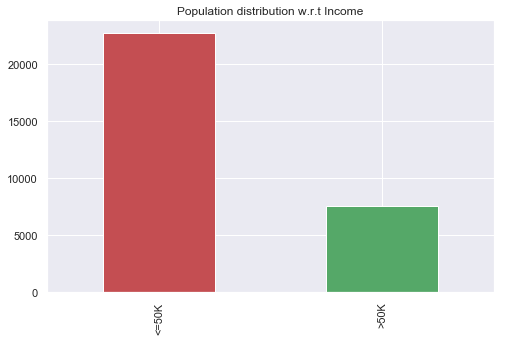

In [21]:
print(data['Income'].value_counts())
data['Income'].value_counts().plot(kind = 'bar', color = ['r','g'], figsize = (8,5),
                                  title = 'Population distribution w.r.t Income')

The target seems to be unbalanced since the no. of people making less than 50K anually is about three times the no. of people making more than 50K anually.

Age ditribution of people in the dataset. Majority of people are less than 60 years old.

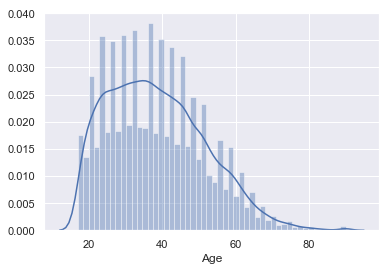

In [22]:
sns.distplot(data['Age'])

Distribution of people by no. of working hours per week. 
Most of the people seem to work for around 40 hours per week.

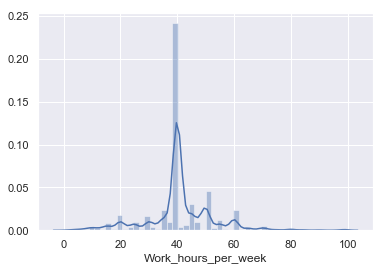

In [23]:
sns.distplot(data['Work_hours_per_week'])

Gender ratio in the dataset. About 2:1

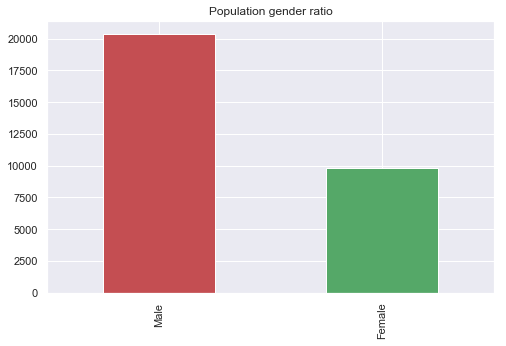

In [25]:
data['Gender'].value_counts().plot(kind = 'bar', figsize = (8,5), color = ['r', 'g'], 
                                  title = 'Population gender ratio')

Proportion of Males and Females earning greater than 50K annually 

In [26]:
Gender_Income = data.groupby(['Gender'])['Income'].value_counts().unstack()
Gender_Income['proportion_>50K(%)'] = (Gender_Income['>50K']/(Gender_Income['>50K'] + Gender_Income['<=50K'])) * 100
Gender_Income

Income,<=50K,>50K,proportion_>50K(%)
Gender,,,
Female,8670,1112,11.367818
Male,13983,6396,31.385250


Text(0, 0.5, '% of population')

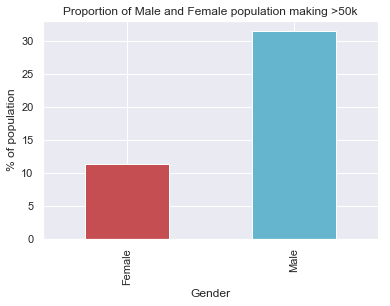

In [27]:
Gender_Income['proportion_>50K(%)'].plot(kind = 'bar', color = ['r','c'], 
                                         title = 'Proportion of Male and Female population making >50k')
plt.ylabel('% of population')

About 31% of males and 11% of females make more than 50K annually.

Thus, a greater percentage of men seem to make >50K than women. Thus, Gender seem to be an important a factor in Income of a person.

Distribution of people by Race. A vast majority of people are white 

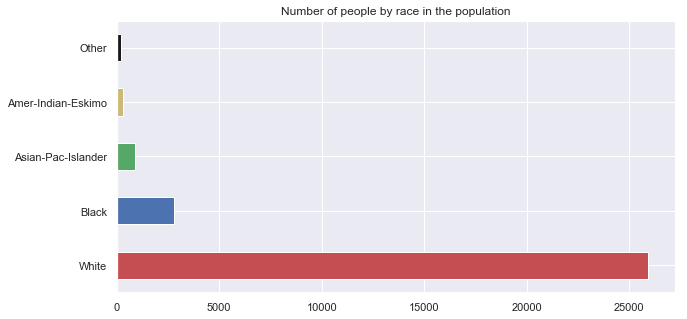

In [28]:
data['Race'].value_counts().plot(kind = 'barh', color = ['r','b','g','y','k'], figsize = (10,5),
                                title = 'Number of people by race in the population')

Proportion of people from all distinct Races making more than 50K annually

Around 27% people from the White and Asian-Pacific Islander Races make >50K whereas only 9% of the people from Black community make >50K. It seems Race is closely related to a person's Income 

In [29]:
Race_Income = data.groupby(['Race','Income'])['Income'].count().unstack()
Race_Income['>50K_proportion(%)'] = (Race_Income['>50K']/(Race_Income['>50K'] + Race_Income['<=50K'])) * 100
Race_Income

Income,<=50K,>50K,>50K_proportion(%)
Race,,,
Amer-Indian-Eskimo,252,34,11.888112
Asian-Pac-Islander,647,248,27.709497
Black,2451,366,12.992545
Other,210,21,9.090909
White,19093,6839,26.372821


Text(0.5, 0, '% of population')

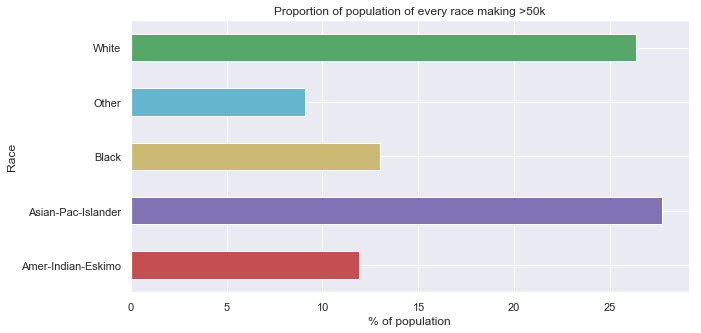

In [30]:
Race_Income['>50K_proportion(%)'].plot(kind = 'barh', color = ['r','m','y','c','g'], figsize = (10,5),
                                      title = 'Proportion of population of every race making >50k')
plt.xlabel('% of population')

Proportion of people making >50K w.r.t their Employment type. 

A majority proportion of self employed people make >50K (around 56% of them), whereas 21% of private employees make >50K. At the same time we can also see that a large no. of people of the total population belong to the private emplyment type group.

In [32]:
Employment_type_Income = data.groupby(['Employment_type', 'Income'])['Income'].count().unstack()

# Replacing the NaN in unpaid professionals >50k column
Employment_type_Income['>50K'].replace(np.NaN,0, inplace = True)

Employment_type_Income['Proportion_>50K_proportion(%)'] = (Employment_type_Income['>50K']/(Employment_type_Income['>50K'] + Employment_type_Income['<=50K'])) * 100
Employment_type_Income

Income,<=50K,>50K,Proportion_>50K_proportion(%)
Employment_type,,,
Federal-gov,578.0,365.0,38.706257
Local-gov,1458.0,609.0,29.462990
Private,17410.0,4876.0,21.879207
Self-emp-inc,474.0,600.0,55.865922
Self-emp-not-inc,1785.0,714.0,28.571429
State-gov,934.0,344.0,26.917058
Without-pay,14.0,0.0,0.000000


Text(0, 0.5, '% of population')

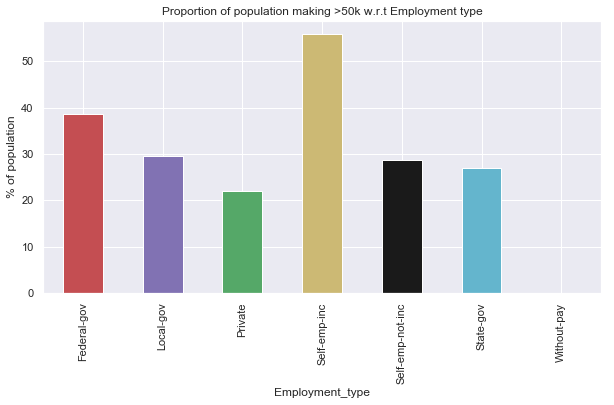

In [33]:
Employment_type_Income['Proportion_>50K_proportion(%)'].plot(kind = 'bar', color = ['r', 'm', 'g','y','k','c'],
                                                             figsize = (10,5),
                                                         title = 'Proportion of population making >50k w.r.t Employment type')
plt.ylabel('% of population')

Number of people making <=50K and >50K w.r.t their Age

In [34]:
Age_Income = data.groupby(['Age', 'Income'])['Income'].count().unstack()
Age_Income.replace(np.NaN, 0, inplace = True)
Age_Income.head()

Income,<=50K,>50K
Age,,
17,328.0,0.0
18,447.0,0.0
19,593.0,1.0
20,629.0,0.0
21,618.0,3.0


The below plot gives a visual insight on the proportion of people making <=50K and >50K with respect to Age of the individual.

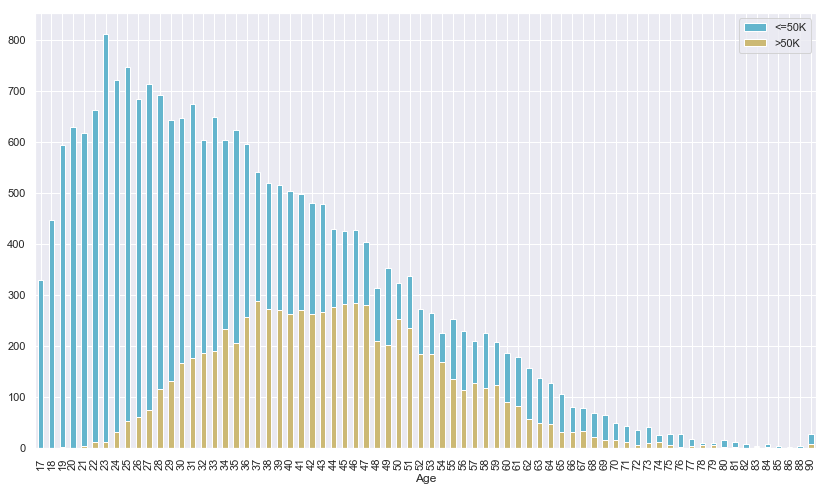

In [35]:
Age_Income['<=50K'].plot(kind = 'bar', color = 'c', figsize = (14,8))
Age_Income['>50K'].plot(kind = 'bar',color = 'y', figsize = (14,8))
plt.legend()
sns.set(style = 'whitegrid')

As the bar plot clearly shows, more people in their late 30s to late 50s tend to make >50K than the people of other Ages.

Income classification w.r.t the native country of the person

More than 40% natives of Taiwan, France, India , Iran make >50K

In [36]:
Native_country_Income = data.groupby(['Native_country', 'Income'])['Income'].count().unstack()
Native_country_Income.replace(np.NaN, 0)
Native_country_Income['>50K_proportion(%)'] = (Native_country_Income['>50K']/(Native_country_Income['>50K'] + Native_country_Income['<=50K'])) * 100
Native_country_Income.sort_values('>50K_proportion(%)', ascending = False).head(10)

Income,<=50K,>50K,>50K_proportion(%)
Native_country,,,
Taiwan,23.0,19.0,45.238095
France,15.0,12.0,44.444444
Iran,24.0,18.0,42.857143
India,60.0,40.0,40.000000
Japan,36.0,23.0,38.983051
Cambodia,11.0,7.0,38.888889
Yugoslavia,10.0,6.0,37.500000
Italy,44.0,24.0,35.294118
England,56.0,30.0,34.883721


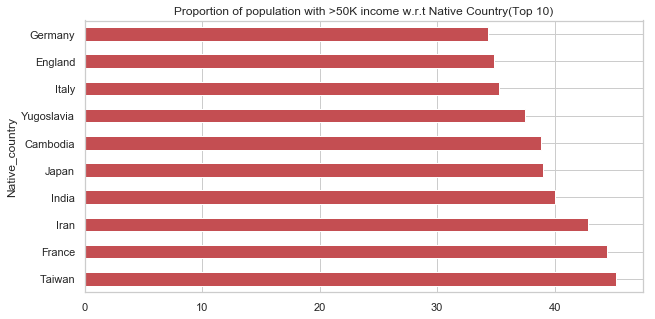

In [37]:
Native_country_Income['>50K_proportion(%)'].sort_values(ascending = False).head(10).plot(kind = 'barh',
                                                                                         figsize = (10,5),
                                                                                        color = 'r',
                                                                                        title = 'Proportion of population with >50K income w.r.t Native Country(Top 10)')
sns.set()

Income classification by Educational background

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

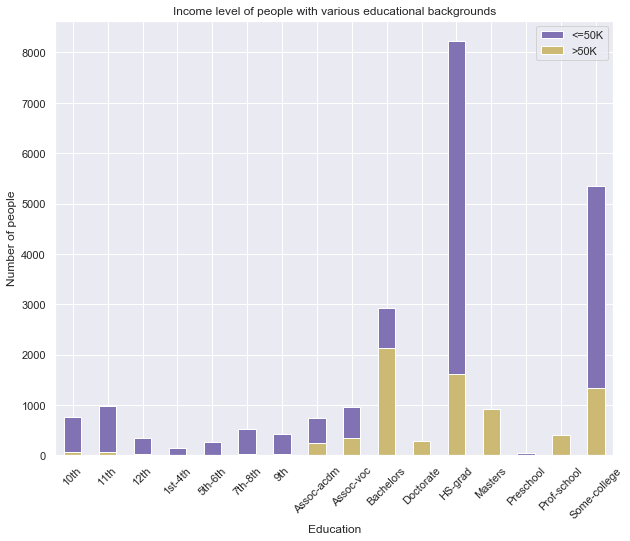

In [38]:
Education_Income = data.groupby(['Education', 'Income'])['Income'].count().unstack().replace(np.NaN, 0)
Education_Income['<=50K'].plot(kind = 'bar', color = 'm', figsize = (10,8))
Education_Income['>50K'].plot(kind = 'bar', color = 'y', figsize = (10,8))
plt.ylabel('Number of people')
plt.title('Income level of people with various educational backgrounds')
plt.legend()
plt.xticks(rotation = 45)

The infographic above indicates that most people in high school make <=50K

A greater proportion of people with Bachelor's degree make >50K

Almost all the people with Doctorates and Masters make >50K

Thus, a person's educational background in genereal seems to play a pivotal role in deciding his Income

Proportion of people making >50K w.r.t their Occupation

In [39]:
Occupation_Income = data.groupby(['Occupation', 'Income'])['Income'].count().unstack()
Occupation_Income['>50K_proportion'] = (Occupation_Income['>50K']/(Occupation_Income['>50K'] + Occupation_Income['<=50K'])) * 100
Occupation_Income

Income,<=50K,>50K,>50K_proportion
Occupation,,,
Adm-clerical,3222,498,13.387097
Armed-Forces,8,1,11.111111
Craft-repair,3122,908,22.531017
Exec-managerial,2055,1937,48.522044
Farming-fishing,874,115,11.627907
Handlers-cleaners,1267,83,6.148148
Machine-op-inspct,1721,245,12.461851
Other-service,3080,132,4.109589
Priv-house-serv,142,1,0.699301


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

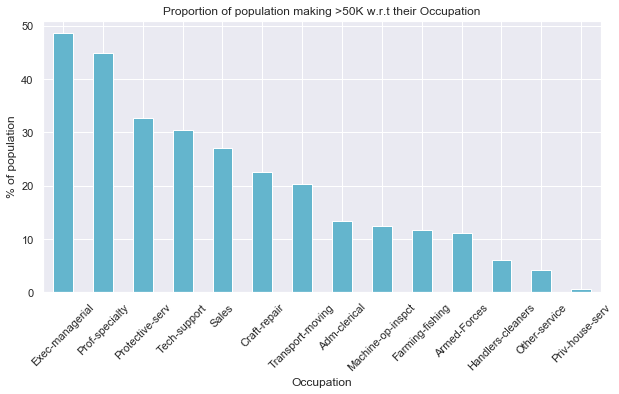

In [40]:
Occupation_Income['>50K_proportion'].sort_values(ascending = False).plot(kind = 'bar', color = 'c', figsize = (10,5))
plt.ylabel('% of population')
plt.title('Proportion of population making >50K w.r.t their Occupation')
plt.xticks(rotation = 45)

As can be observed from the bar plot above, almost 50% of the people working as executive managers make >50K annually.

Also, occupations like private house service and cleaners seem to hardly pay people >50K

# Readying the test set

In [41]:
test.head()

,Age,Employment_type,Education,Marital_status,Occupation,Relationship,Race,Gender,Work_hours_per_week,Native_country,Income
0,25,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,<=50K.
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,<=50K.
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,>50K.
3,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,>50K.
4,18,?,Some-college,Never-married,?,Own-child,White,Female,30,United-States,<=50K.


In [42]:
for col in test.columns:
    test = test[test[col] != '?']

In [43]:
cols = ['Age','Work_hours_per_week']
for col in cols:
    test[col] = test[col].astype('int')

# Data Preparation, Preprocessing and Model Building

Assigning binary variables 0 and 1 to our two target classes <=50K and >50K respectively

In [44]:
data = data.replace({'Income':{'<=50K':0, '>50K':1}})

In [45]:
test = test.replace({'Income':{'<=50K.':0, '>50K.':1}})

Getting dummies for categorical variables

In [46]:
data = pd.get_dummies(data, columns = ['Employment_type', 'Education', 'Marital_status', 'Occupation',
       'Relationship', 'Race', 'Gender','Native_country'])

test = pd.get_dummies(test, columns = ['Employment_type', 'Education', 'Marital_status', 'Occupation',
       'Relationship', 'Race', 'Gender','Native_country'])


In [47]:
test.head()

,Age,Work_hours_per_week,Income,Employment_type_Federal-gov,Employment_type_Local-gov,Employment_type_Private,Employment_type_Self-emp-inc,Employment_type_Self-emp-not-inc,Employment_type_State-gov,Employment_type_Without-pay,...,Native_country_Portugal,Native_country_Puerto-Rico,Native_country_Scotland,Native_country_South,Native_country_Taiwan,Native_country_Thailand,Native_country_Trinadad&Tobago,Native_country_United-States,Native_country_Vietnam,Native_country_Yugoslavia
0,25,40,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,50,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,40,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,40,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,34,30,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [48]:
print(data.shape)
print(test.shape)

(30161, 101)
(15060, 100)


It seems after assigning dummy variables to both the training and the test sets we have one variable/feature in the training set that is not present in the test set. We need to find it and drop it.

In [49]:
for column in data.columns:
    if column not in test.columns:
        print(column)

Native_country_Holand-Netherlands


In [50]:
data.drop(columns = ['Native_country_Holand-Netherlands'], inplace = True)

Readying the train and test sets for modelling

In [51]:
y = data['Income']
data.drop(columns = 'Income', inplace = True)
X = data

In [52]:
test_y = test['Income']
test.drop(columns = 'Income', inplace = True)
X_test = test

# Model Building

Importing dependencies from the scikit learn library for machine learning

In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_recall_curve

We would begin with Logistic Regression, one of the most simple yet powerful classification algorithm.

# Logistic Regression

The single most important parameter to tune when implementing Logistic Regression in scikit learn is the 'C' parameter. Therefore we would compute accuracy of the Logistic Regression model using a number of different values for the 'C' parameter and then build a model and evaluate it.

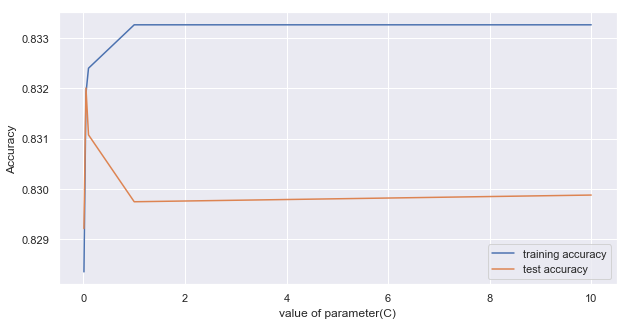

In [54]:
train_accuracy = []
test_accuracy = []
c = [0.01,0.05,0.1,1,10]

for C in c:
    LR = LogisticRegression(solver = 'liblinear', C = C)
    LR.fit(X,y)
    train_accuracy.append(LR.score(X,y))
    test_accuracy.append(LR.score(X_test, test_y))
    
plt.figure(figsize = (10,5))    
plt.plot(c, train_accuracy, label = 'training accuracy', )
plt.plot(c, test_accuracy, label = 'test accuracy')
plt.ylabel('Accuracy')
plt.xlabel('value of parameter(C)')
plt.legend()    

In [55]:
lr = LogisticRegression(solver = 'liblinear' ,C = 0.1, max_iter = 1000, random_state = 100)
model = lr.fit(X,y)

print("Training accuracy (Logistic Regression): {:.2f}".format(lr.score(X,y)))

Training accuracy (Logistic Regression): 0.83


Setting the value of the 'C' parameter to 0.1 has yielded a training accuracy of 0.83. Now, let's evaluate ho is the model generalizing on the test data

In [56]:
y_pred_lr = model.predict(X_test)

In [57]:
conf_lr = confusion_matrix(test_y, y_pred_lr)
conf_lr

array([[10461,   899],
       [ 1645,  2055]], dtype=int64)

The model generalizes quite well yielding 83% accuracy on the test set.
The true negative rate i.e. for the <50K class is good at 92% although the true positive rate for the >50K is average at 56%
Similarly, the negative class <50K class has been predicted with a high degree of precision at 86% whereas >50K class has been predicted with around 70%.

Below is the detailed classification report of the perfomance of the Logistic Regression Classifier

In [59]:
print(classification_report(test_y, y_pred_lr))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89     11360
           1       0.70      0.56      0.62      3700

    accuracy                           0.83     15060
   macro avg       0.78      0.74      0.75     15060
weighted avg       0.82      0.83      0.82     15060



Following is the precicion recall curve for the classification of the Logistic Regression model

c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


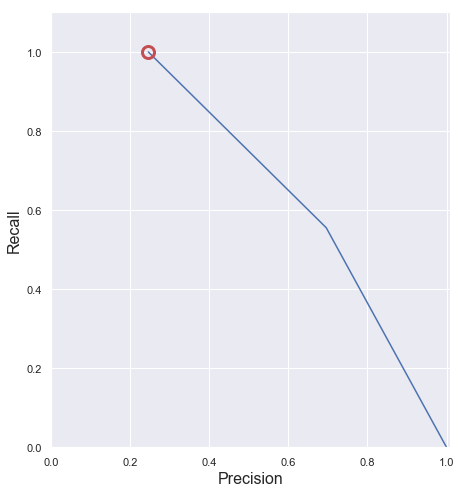

In [60]:
precision_lr, recall_lr, thresholds_lr = precision_recall_curve(test_y, y_pred_lr)
closest_zero = np.argmin(np.abs(thresholds_lr))
closest_zero_p = precision_lr[closest_zero]
closest_zero_r = recall_lr[closest_zero]

plt.figure(figsize = (8,8))
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.1])
plt.plot(precision_lr, recall_lr, label='Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()

Overall the Logistic Regression model has done a good job in predicting the negative class which actually is the majorit class and not that a good job in predicting the positive class.

# K- Nearest Neighbors

The most important parameter to tune that affects the perfomance the most is the no. of neighbors parameter. 
Let's create a plot showing training and test accuracy after training KNN model for a range of n_neighbors.

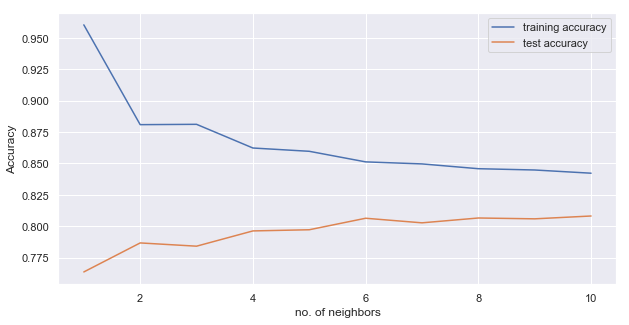

In [61]:
train_accuracy = []
test_accuracy = []
neighbors = range(1,11)
for n_neighbors in neighbors:
    KNN = KNeighborsClassifier(n_neighbors = n_neighbors, weights = 'uniform', n_jobs = 5)
    KNN.fit(X,y)
    train_accuracy.append(KNN.score(X,y))
    test_accuracy.append(KNN.score(X_test, test_y))

plt.figure(figsize = (10,5))    
plt.plot(neighbors, train_accuracy, label = 'training accuracy')
plt.plot(neighbors, test_accuracy, label = 'test accuracy')
plt.ylabel('Accuracy')
plt.xlabel('no. of neighbors')
plt.legend()

In [62]:
knn =KNeighborsClassifier(n_neighbors = 6, weights = 'uniform', n_jobs = 5)
knn_model = knn.fit(X,y)
print("Training accuracy (K- Nearest Neighbors): {:.2f}".format(knn.score(X,y)))

Training accuracy (K- Nearest Neighbors): 0.85


Applying the model on the test data

In [63]:
y_pred_knn = knn_model.predict(X_test)

Confusion matrix

In [64]:
conf_knn = confusion_matrix(test_y, y_pred_knn)
conf_knn

array([[10368,   992],
       [ 1924,  1776]], dtype=int64)

Detailed classification report for the KNN classifier

KNN does quite well at predicting the majority class i.e. the negative class and also overall accuracy of 81% but does no better rather worse than Logistic Regression at predicting the minority class (positive class).

In [66]:
print(classification_report(test_y, y_pred_knn))

              precision    recall  f1-score   support

           0       0.84      0.91      0.88     11360
           1       0.64      0.48      0.55      3700

    accuracy                           0.81     15060
   macro avg       0.74      0.70      0.71     15060
weighted avg       0.79      0.81      0.80     15060



Precision - recall curve for the KNN binary classifier

c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


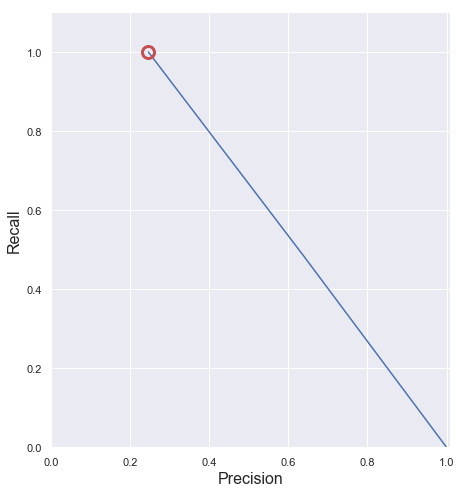

In [67]:
precision, recall, thresholds = precision_recall_curve(test_y, y_pred_knn)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

plt.figure(figsize = (8,8))
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.1])
plt.plot(precision, recall, label='Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()

# Support Vector Classifier

Here in SVC we will be finding the appropriate value for the C parameter in order to optimize the model. 
Plotting the train and test accuracy for a number of values of C

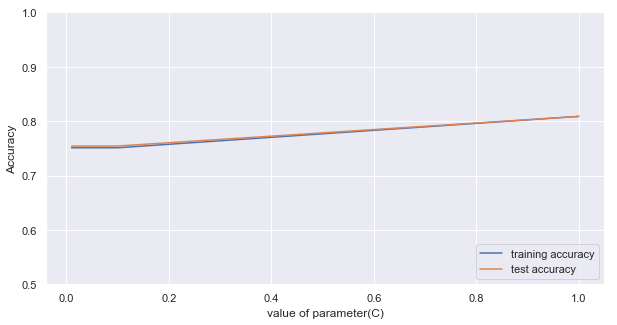

In [68]:
train_accuracy = []
test_accuracy = []
c = [0.01,0.05,0.1,1]

for C in c:
    SVC = svm.SVC(gamma = 'scale', C = C)
    SVC.fit(X,y)
    train_accuracy.append(SVC.score(X,y))
    test_accuracy.append(SVC.score(X_test, test_y))
    
plt.figure(figsize = (10,5))    
plt.ylim(0.5,1)
plt.plot(c, train_accuracy, label = 'training accuracy')
plt.plot(c, test_accuracy, label = 'test accuracy')
plt.ylabel('Accuracy')
plt.xlabel('value of parameter(C)')
plt.legend(loc = 4)    

In [69]:
svc = svm.SVC(kernel = 'poly',C = 1, gamma = 'scale')
svc_model = svc.fit(X,y)
print("Training accuracy (Support Vector Classifier): {:.2f}".format(svc.score(X,y)))

Training accuracy (Support Vector Classifier): 0.81


Making predictions on the test data

In [70]:
y_pred_svc = svc_model.predict(X_test)

Detailed classification report for the SVC classifier

In [73]:
print(classification_report(test_y, y_pred_svc))

              precision    recall  f1-score   support

           0       0.82      0.96      0.89     11360
           1       0.75      0.35      0.48      3700

    accuracy                           0.81     15060
   macro avg       0.79      0.66      0.68     15060
weighted avg       0.80      0.81      0.79     15060



With almost similar overall accuracy SVC does does a great job at predicting the majority class in the data but not that well in predicting the minority class.

Below is the precision recall curve for SVC Classifier

c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


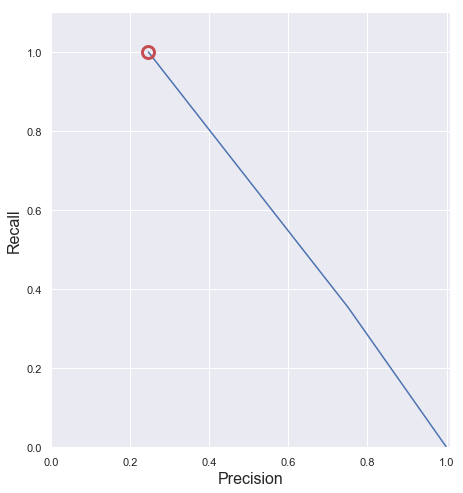

In [74]:
precision, recall, thresholds = precision_recall_curve(test_y, y_pred_svc)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

plt.figure(figsize = (8,8))
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.1])
plt.plot(precision, recall, label='Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()

# Decision Tree Classifier

Testing out a tree classifier and observe how does it perform in predicting majority and minority classes. 

In [75]:
dt = DecisionTreeClassifier(max_features = 20, max_depth = 5)
dt_model = dt.fit(X,y)

print("Training accuracy (Decision Tree Classifier): {:.2f}".format(dt.score(X,y)))

Training accuracy (Decision Tree Classifier): 0.79


In [76]:
y_pred_dt = dt_model.predict(X_test)

In [77]:
conf_dt = confusion_matrix(test_y, y_pred_dt)
conf_dt

array([[10635,   725],
       [ 2324,  1376]], dtype=int64)

The below classification report suggests that the decision tree classifier performs no better than LR, KNN and SVM i.e. does a good job at predicting the negative class (i.e. the majority class) and not a good job at predicting the minority class.

In [79]:
print(classification_report(test_y, y_pred_dt))

              precision    recall  f1-score   support

           0       0.82      0.94      0.87     11360
           1       0.65      0.37      0.47      3700

    accuracy                           0.80     15060
   macro avg       0.74      0.65      0.67     15060
weighted avg       0.78      0.80      0.78     15060



Below precision-recall curve tells almost the same story as well.

c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


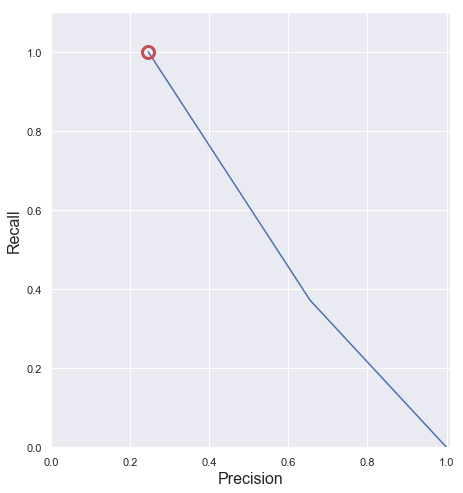

In [80]:
precision, recall, thresholds = precision_recall_curve(test_y, y_pred_dt)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

plt.figure(figsize = (8,8))
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.1])
plt.plot(precision, recall, label='Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()

Since, the tree classifier performs no better than the other binary classifiers, let us apply some comparatively complex models and see how do they perform in predicting the minority class.

# Random Forest Classifier

We wouldn't be striving for the best features now, but would build an optimal model just in order to make sure whether we could improve our perfomance in predicting the minority class.

In [81]:
rfc = RandomForestClassifier(n_estimators = 200, max_depth = 10, n_jobs = 2, random_state = 100)
rfc_model = rfc.fit(X,y)

print("Training accuracy (Random Forest Classifier): {:.2f}".format(rfc.score(X,y)))

Training accuracy (Random Forest Classifier): 0.84


In [82]:
y_pred_rfc = rfc_model.predict(X_test)

In [83]:
conf_rfc = confusion_matrix(test_y, y_pred_rfc)
conf_rfc

array([[10716,   644],
       [ 1892,  1808]], dtype=int64)

Good Overall Accuracy as the previous models

Does quite well in predicting the majority class

Does better than previous models in predicting the minority class

In [85]:
print(classification_report(test_y, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.85      0.94      0.89     11360
           1       0.74      0.49      0.59      3700

    accuracy                           0.83     15060
   macro avg       0.79      0.72      0.74     15060
weighted avg       0.82      0.83      0.82     15060



c:\users\admin\appdata\local\programs\python\python37-32\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


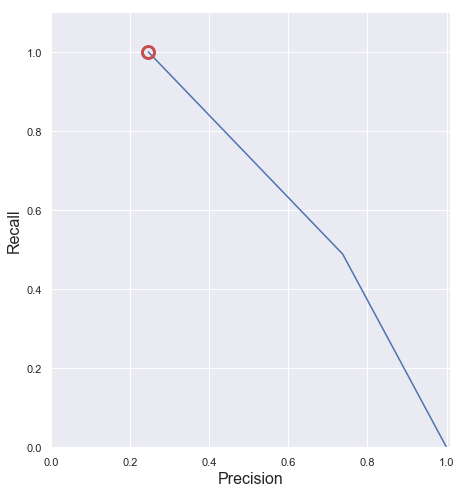

In [86]:
precision, recall, thresholds = precision_recall_curve(test_y, y_pred_rfc)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

plt.figure(figsize = (8,8))
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.1])
plt.plot(precision, recall, label='Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()

# Gradient Boosted Decision Trees

Let us see if boosting the weak learners of a Decision tree by means of a simple GBDT model help in improving prediction perfomance on the minority class

In [87]:
gbdt = GradientBoostingClassifier(max_depth = 5, n_estimators = 20, max_features = 10, random_state = 10)
gbdt_model = gbdt.fit(X,y)

print("Training accuracy (Gradient Boosted Decision Trees): {:.2f}".format(gbdt.score(X,y)))

Training accuracy (Gradient Boosted Decision Trees): 0.82


In [88]:
y_pred_gbdt = gbdt_model.predict(X_test)

In [89]:
conf_gbdt = confusion_matrix(test_y, y_pred_gbdt)
conf_gbdt

array([[10824,   536],
       [ 2144,  1556]], dtype=int64)

In [91]:
print(classification_report(test_y, y_pred_gbdt))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89     11360
           1       0.74      0.42      0.54      3700

    accuracy                           0.82     15060
   macro avg       0.79      0.69      0.71     15060
weighted avg       0.81      0.82      0.80     15060



It does better than traditional Decision trees model but not better than Random Forest Classifier in predicting the minority class.

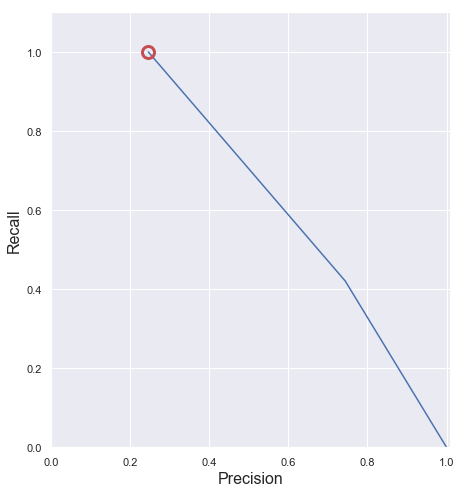

In [99]:
precision, recall, thresholds = precision_recall_curve(test_y, y_pred_gbdt)
closest_zero = np.argmin(np.abs(thresholds))
closest_zero_p = precision[closest_zero]
closest_zero_r = recall[closest_zero]

plt.figure(figsize = (8,8))
plt.xlim([0.0, 1.01])
plt.ylim([0.0, 1.1])
plt.plot(precision, recall, label='Precision-Recall Curve')
plt.plot(closest_zero_p, closest_zero_r, 'o', markersize = 12, fillstyle = 'none', c='r', mew=3)
plt.xlabel('Precision', fontsize=16)
plt.ylabel('Recall', fontsize=16)
plt.axes().set_aspect('equal')
plt.show()

With some more tuning of parameters in both the ensemble methods we could still marginally improve the perfomance of predicting the minority class correctly but not as good as the majority class for sure.